In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Esercitazione 6

In [3]:
#descrivere modifiche al codice
#dì però che hai equilibrato ogni cosa e anche che l'equilibrazione con il campo !=0 è diversa

## Analisi in assenza di campo esterno

Fase di equilibrazione

Il concetto è che l'equilibrazione è difficile a basse temperature perchè io inizializzo il sistema con spin random ergo se vedo che alla temperatura più bassa già dopo 20 mosse il sistema è equilibrato sono praticamente in una botte di ferro se ogni blocco dura 20000, anche perchè io faccio il primo campionamento a $\mathrm{T^*}=2.0$ e poi scendo man mano di temperatura mettendo la configurazione finale del campionamento precedente come configurazione iniziale del nuovo campionamento ergo essenzialmente a ogni simulazione il sistema parte già equilibrato.

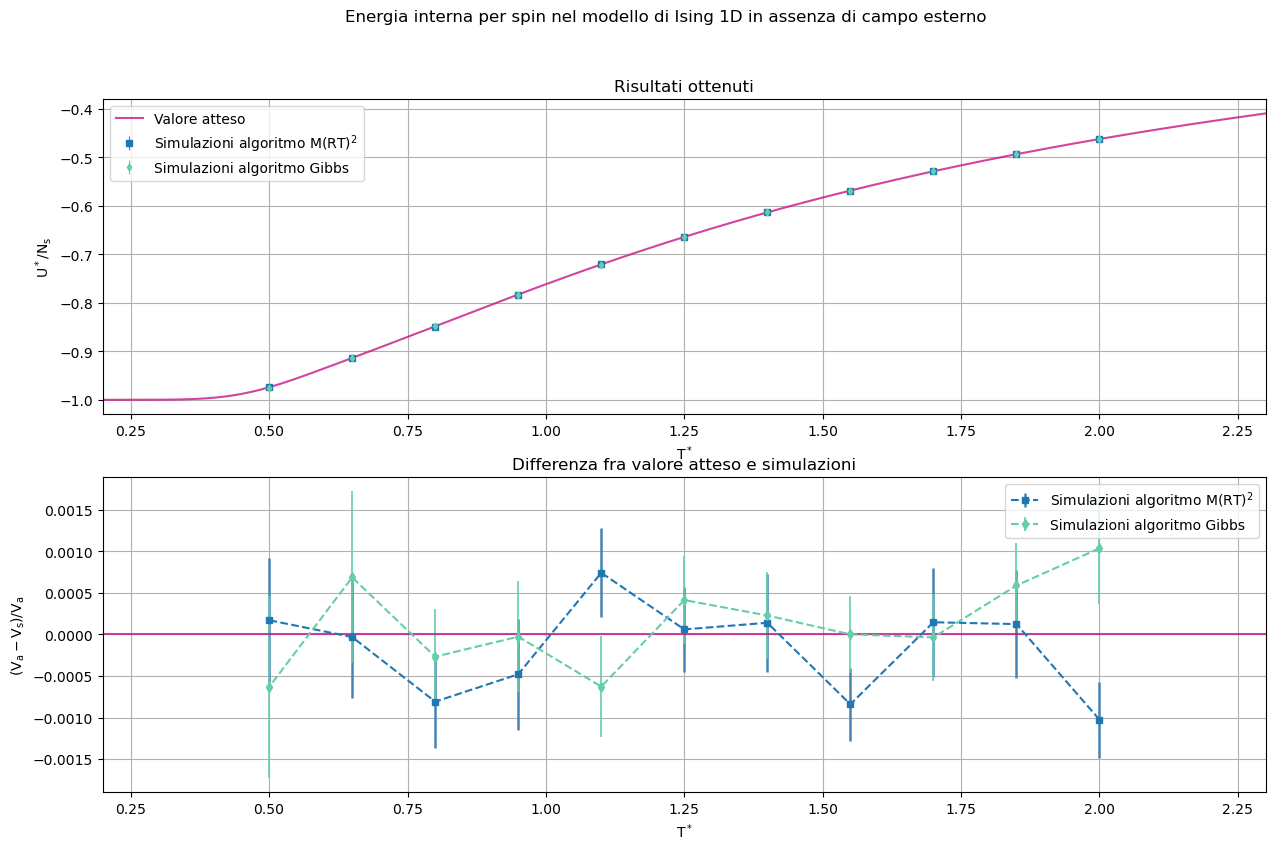

In [5]:
def Etot(T):  #calcolo analitico dell'energia interna
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    ch=1/th
    return -J*( th + ch*thN )/( 1 + thN )

T=np.linspace(0.2, 2.3, 200)  #temperature per il plot del valore analitico

x, metr_toten, metr_erroren=np.loadtxt("Risultati/metr_fin_toten.dat", usecols=(0, 1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_toten, gib_erroren=np.loadtxt("Risultati/gib_fin_toten.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

enfig ,(enplt1, enplt2) = plt.subplots(2, 1, figsize=(15, 9))

enplt1.plot(T, Etot(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
enplt1.errorbar(x, metr_toten, yerr=metr_erroren, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
enplt1.errorbar(x, gib_toten, yerr=gib_erroren, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
enplt1.set_xlabel(r"$\mathrm{T^*}$")
enplt1.set_ylabel(r"$\mathrm{U^* / N_s}$")
enplt1.set_xlim(T.min(), T.max())
enplt1.set_title("Risultati ottenuti")
enplt1.grid(True)
enplt1.legend()

enplt2.errorbar(x, (Etot(x)-metr_toten)/Etot(x), yerr=np.abs(metr_erroren/Etot(x)), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
enplt2.errorbar(x, (Etot(x)-gib_toten)/Etot(x), yerr=np.abs(gib_erroren/Etot(x)), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
enplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
enplt2.set_xlabel(r"$\mathrm{T^*}$")
enplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
enplt2.set_xlim(T.min(), T.max())
enplt2.set_title("Differenza fra valore atteso e simulazioni")
enplt2.grid(True)
enplt2.legend()

enfig.suptitle("Energia interna per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

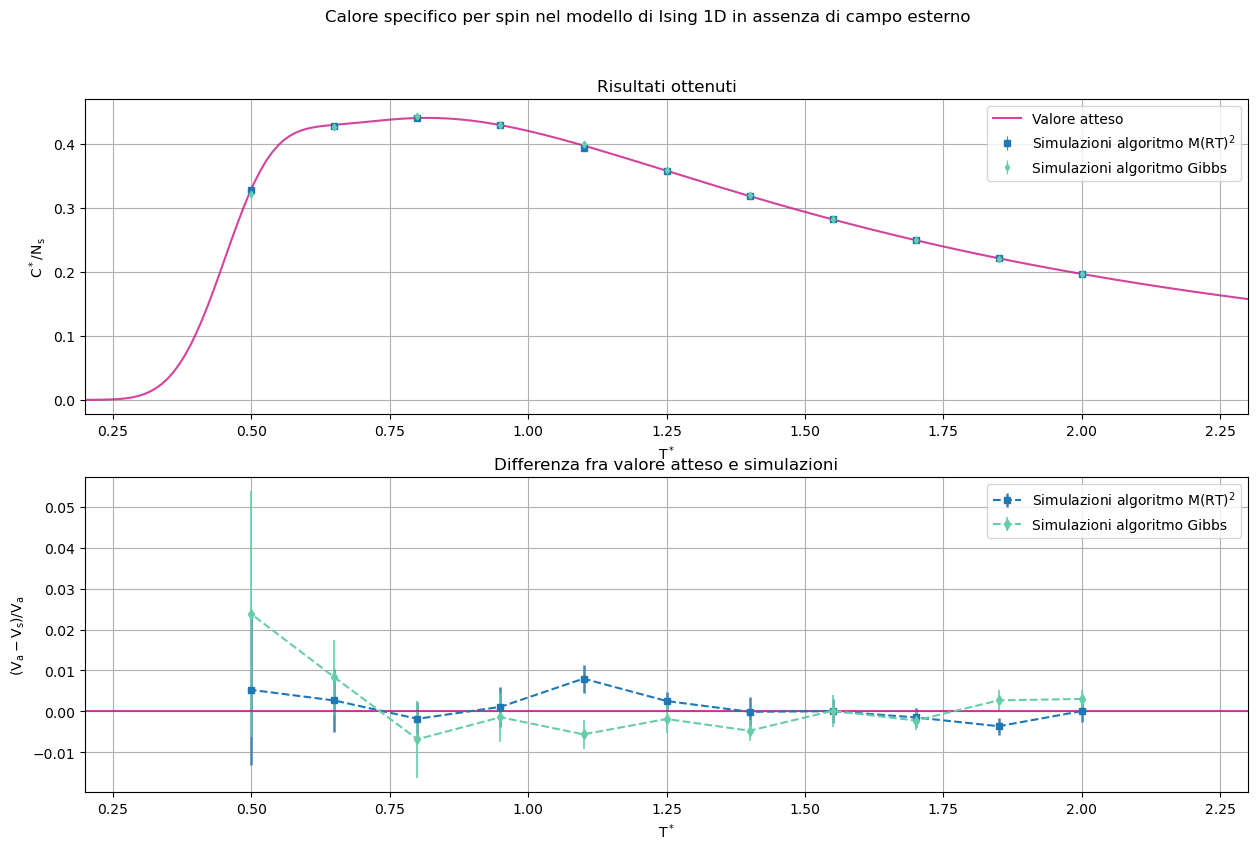

In [6]:
def Cs(T):  #calcolo analitico del calore specifico
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    ch=1/th
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

metr_calspec, metr_errorcs=np.loadtxt("Risultati/metr_fin_specheat.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_calspec, gib_errorcs=np.loadtxt("Risultati/gib_fin_specheat.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

csfig ,(csplt1, csplt2) = plt.subplots(2, 1, figsize=(15, 9))

csplt1.plot(T, Cs(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
csplt1.errorbar(x, metr_calspec, yerr=metr_errorcs, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt1.errorbar(x, gib_calspec, yerr=gib_errorcs, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
csplt1.set_xlabel(r"$\mathrm{T^*}$")
csplt1.set_ylabel(r"$\mathrm{C^* / N_s}$")
csplt1.set_xlim(T.min(), T.max())
csplt1.set_title("Risultati ottenuti")
csplt1.grid(True)
csplt1.legend()

csplt2.errorbar(x, (Cs(x)-metr_calspec)/Cs(x), yerr=metr_errorcs/Cs(x), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
csplt2.errorbar(x, (Cs(x)-gib_calspec)/Cs(x), yerr=gib_errorcs/Cs(x), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
csplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
csplt2.set_xlabel(r"$\mathrm{T^*}$")
csplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
csplt2.set_xlim(T.min(), T.max())
csplt2.set_title("Differenza fra valore atteso e simulazioni")
csplt2.grid(True)
csplt2.legend()

csfig.suptitle("Calore specifico per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

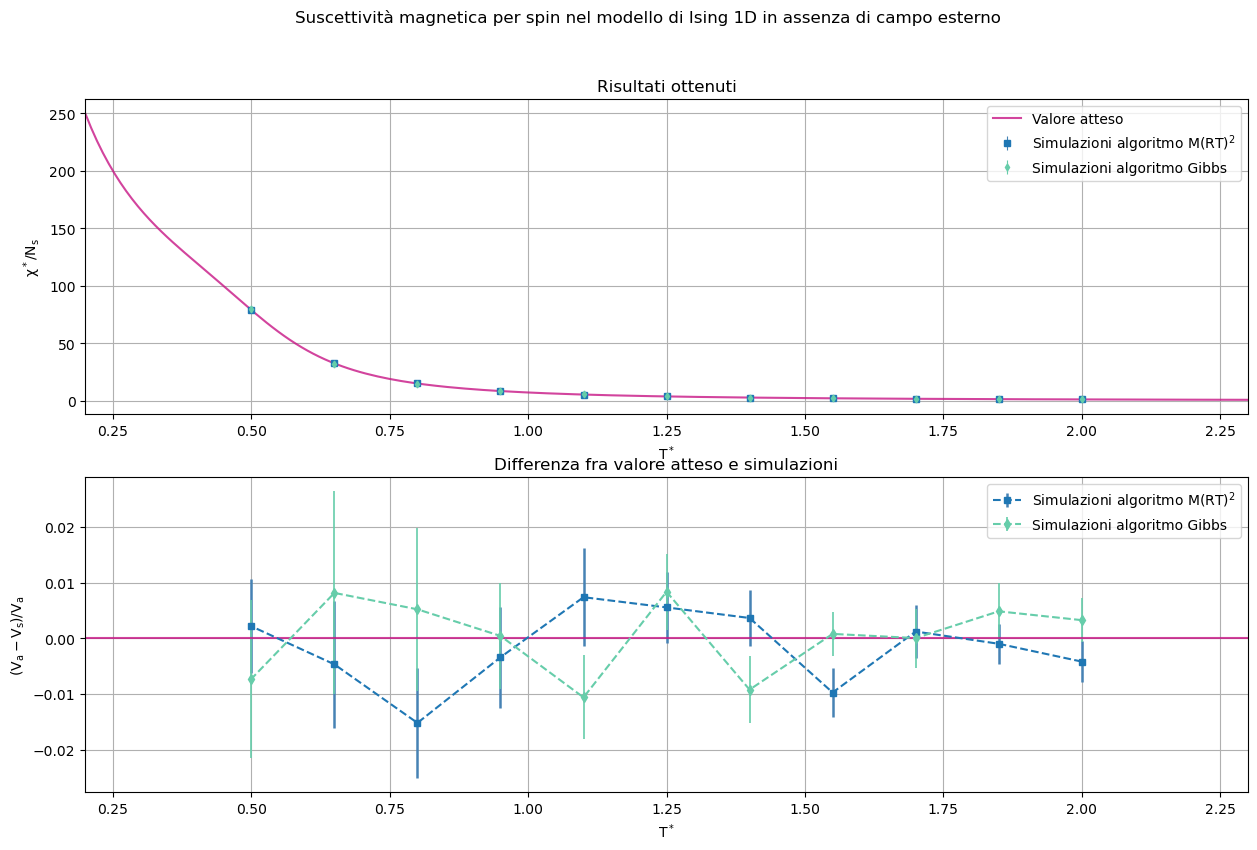

In [7]:
def Chi(T):  #calcolo analitico della suscettività
    beta=1/T
    J=1.0
    Ns=50
    th=np.tanh(J/T)
    thN=th**Ns
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    
metr_susc, metr_errorsu=np.loadtxt("Risultati/metr_fin_susc.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_susc, gib_errorsu=np.loadtxt("Risultati/gib_fin_susc.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

sufig ,(suplt1, suplt2) = plt.subplots(2, 1, figsize=(15, 9))

suplt1.plot(T, Chi(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
suplt1.errorbar(x, metr_susc, yerr=metr_errorsu, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
suplt1.errorbar(x, gib_susc, yerr=gib_errorsu, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
suplt1.set_xlabel(r"$\mathrm{T^*}$")
suplt1.set_ylabel(r"$\mathrm{ \chi ^* / N_s}$")
suplt1.set_xlim(T.min(), T.max())
suplt1.set_title("Risultati ottenuti")
suplt1.grid(True)
suplt1.legend()

suplt2.errorbar(x, (Chi(x)-metr_susc)/Chi(x), yerr=metr_errorsu/Chi(x), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
suplt2.errorbar(x, (Chi(x)-gib_susc)/Chi(x), yerr=gib_errorsu/Chi(x), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
suplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
suplt2.set_xlabel(r"$\mathrm{T^*}$")
suplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
suplt2.set_xlim(T.min(), T.max())
suplt2.set_title("Differenza fra valore atteso e simulazioni")
suplt2.grid(True)
suplt2.legend()

sufig.suptitle("Suscettività magnetica per spin nel modello di Ising 1D in assenza di campo esterno")
plt.show()

## Analisi in presenza di campo esterno

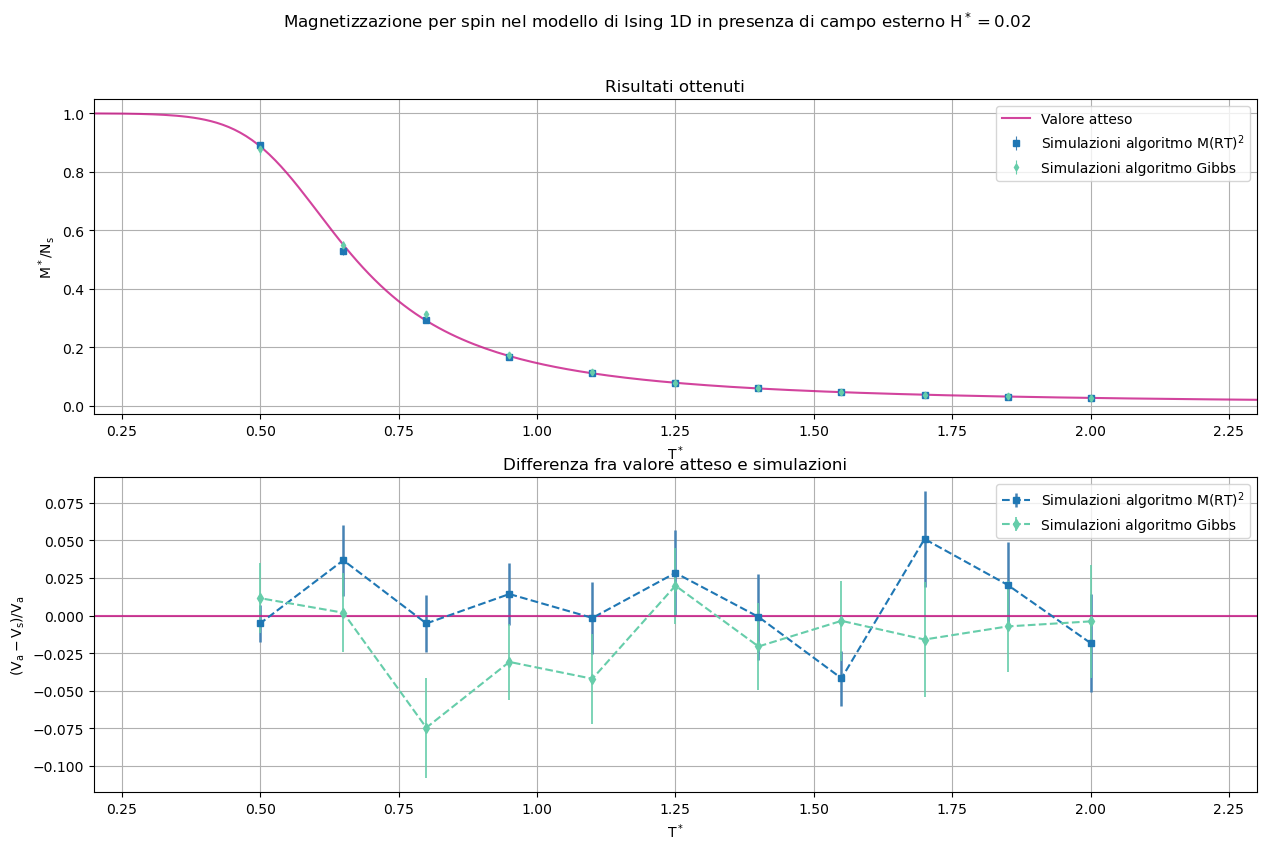

In [8]:
def Mag(T):  #calcolo analitico della magnetizzazione
    h=0.02 #external field
    b = 1/T
    J=1.0
    Ns=50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

metr_magn, metr_errorma=np.loadtxt("Risultati/metr_fin_magn.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni
gib_magn, gib_errorma=np.loadtxt("Risultati/gib_fin_magn.dat", usecols=(1, 2),  unpack="true")  #vettori per il plot dei valori ottenuti mediante simulazioni

mafig ,(maplt1, maplt2) = plt.subplots(2, 1, figsize=(15, 9))

maplt1.plot(T, Mag(T), color="mediumvioletred", label="Valore atteso", alpha=0.8)
maplt1.errorbar(x, metr_magn, yerr=metr_errorma, fmt='s', linestyle='', elinewidth=0.8, ecolor="steelblue", markersize=4.5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt1.errorbar(x, gib_magn, yerr=gib_errorma, fmt='d', linestyle='', elinewidth=0.8, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=3.5, label=r"Simulazioni algoritmo Gibbs")
maplt1.set_xlabel(r"$\mathrm{T^*}$")
maplt1.set_ylabel(r"$\mathrm{ M^* / N_s}$")
maplt1.set_xlim(T.min(), T.max())
maplt1.set_title("Risultati ottenuti")
maplt1.grid(True)
maplt1.legend()

maplt2.errorbar(x, (Mag(x)-metr_magn)/Mag(x), yerr=metr_errorma/Mag(x), fmt='s', linestyle='--', elinewidth=1.8, ecolor="steelblue", markersize=5, label=r"Simulazioni algoritmo $\mathrm{M(RT)^2}$")
maplt2.errorbar(x, (Mag(x)-gib_magn)/Mag(x), yerr=gib_errorma/Mag(x), fmt='d', linestyle='--', elinewidth=1.2, color="mediumaquamarine", ecolor="mediumaquamarine", markersize=5, label=r"Simulazioni algoritmo Gibbs")
maplt2.axhline(y=0, color="mediumvioletred", alpha=0.8)
maplt2.set_xlabel(r"$\mathrm{T^*}$")
maplt2.set_ylabel(r"$\mathrm{ (V_a - V_s)/V_a }$")
maplt2.set_xlim(T.min(), T.max())
maplt2.set_title("Differenza fra valore atteso e simulazioni")
maplt2.grid(True)
maplt2.legend()

mafig.suptitle(r"Magnetizzazione per spin nel modello di Ising 1D in presenza di campo esterno $\mathrm{H^*}=0.02$")
plt.show()